In [20]:
import nia22
import json
import numpy as np
from glob import glob
import matplotlib.pyplot as plt 

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

원천데이터 읽기

In [7]:
json_dir = "/home/hoseung/Work/NIA/onecycle_final/json/"
png_dir = "/home/hoseung/Work/NIA/onecycle_final/png/"

jlist = glob(json_dir+"*.json")
jlist.sort()

원천데이터에서 영상 종류 읽어오기
- 프레임당 정보이므로 클립 하나에 여러번 중복됨. 
- unique로 한 가지씩만 남기기

In [8]:
displays = []
conditions = []
postures =[]
all_tags = []
for fn_j in jlist:
    anno = json.load(open(fn_j))
    project, site, x1, x2, x3, display, dtype, posture, condition, orientation, frame \
        = anno["Annotations"]["image"]['name'].split(".png")[0].split("_")
    displays.append(display)
    conditions.append(condition)
    postures.append(posture)
    all_tags.append("_".join((display,condition,posture,orientation)))
    
clips = np.unique(all_tags)

영상 종류 쓰기 좋은 모양으로 변경

In [9]:
clip_dist = []
for tag in clips:
    d,c,p,o = tag.split("_")
    clip_dist.append([d,c,p])

clip_dist = np.array(clip_dist)

가짜 prediction 생성.  
50개 중 21개를 맞게 하고, 나머지는 랜덤 -> ~ 42%의 WAR 나옴  -- 훈련 결과와 비슷

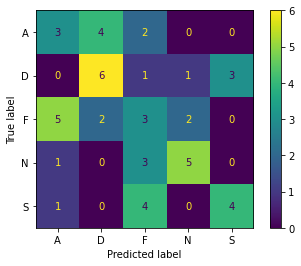

In [76]:
y_true = clip_dist[4::2,1]
n_examples = len(clip_dist[4::2,1])
# random guess
y_pred = np.random.choice(y_true, n_examples)
# give some correct guesses
ind_correct = np.random.choice(np.arange(n_examples), 21)
y_pred[ind_correct] = y_true[ind_correct]
#confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_predictions(y_true, y_pred, ax=ax)
plt.savefig("DFER_confusion_matrix_onecycle.png")

In [78]:
from sklearn.metrics import classification_report

target_names = np.unique(clip_dist[:,1])

report = classification_report(y_true, y_pred, target_names=target_names, output_dict=True)

In [79]:
report["weighted avg"]

{'precision': 0.43474175824175826,
 'recall': 0.42,
 'f1-score': 0.42510706689998656,
 'support': 50}